In [148]:
import tensorflow as tf
keras = tf.keras
layers = keras.layers
import numpy as np
import cv2
from PIL import Image
import os
import matplotlib.pyplot as plt

from functools import wraps
import time

In [149]:
def show_2_images(src, dst):
    plt.figure(figsize=(8, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(src)
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(dst)
    plt.axis('off')
    
    plt.show()


# Декоратор для проверки времени работы функции
def timer(func):

    @wraps(func)
    def wrapper(*args, **kwargs):
        t = time.time()
        func(*args, **kwargs)
        print(time.time() - t)
    return wrapper

In [150]:
def init_fmodel():
    model = keras.Sequential([])
    model.add(layers.Conv2D(64, 3, 1, padding='same', activation='relu'))
    model.add(layers.UpSampling2D(2))
    model.add(layers.Conv2D(32, 3, 1, padding='same', activation='relu'))
    model.add(layers.Conv2D(3, 3, 1, padding='same', activation='relu'))
    return model

In [151]:
len(os.listdir('images/train2014/'))

82783

In [152]:
filenames = ['images/train2014/' + name for name in os.listdir('images/train2014/')]

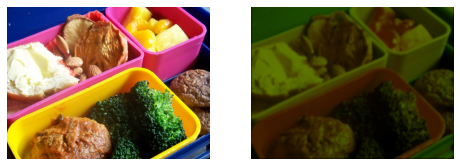

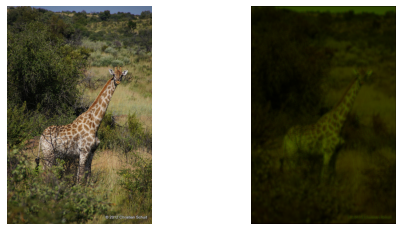

Step - 0;	Loss - 0.1639
Step - 5;	Loss - 0.1185
Step - 10;	Loss - 0.1059
Step - 15;	Loss - 0.0632
Step - 20;	Loss - 0.0516


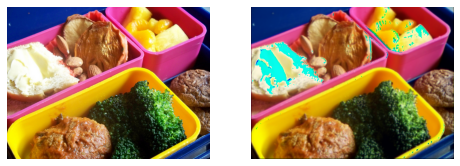

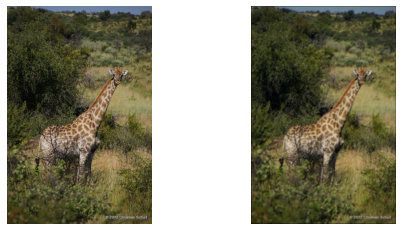

In [156]:
@tf.function
def grad(model, inputs, targets, loss):
    with tf.GradientTape() as g:
        g_loss = loss(targets, model(inputs))
        grads = g.gradient(g_loss, model.trainable_variables)
    return g_loss, grads


optimizer_obj = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_obj = lambda x, y: tf.math.reduce_mean(tf.math.abs(tf.math.subtract(x, y)))
model = init_fmodel()





for filename in [filenames[0], filenames[100]]:
    src_img = Image.open(filename).convert('RGB')
    src_img_ = (np.expand_dims(np.array(src_img), axis=0) / 255.).astype(np.float32)
    resized_img = np.array(src_img.resize([size // 2 for size in src_img.size], Image.ANTIALIAS))
    resized_img_ = (np.expand_dims(resized_img, axis=0) / 255.).astype(np.float32)
    res = model(np.array(resized_img_))
    res = (res.numpy().squeeze(0) * 255).astype(np.uint8)
    show_2_images(np.array(src_img), res)


for step in range(25):
    
    for filename in [filenames[0], filenames[100]]:
        src_img = Image.open(filename).convert('RGB')
        src_img_ = (np.expand_dims(np.array(src_img), axis=0) / 255.).astype(np.float32)
        resized_img = np.array(src_img.resize([size // 2 for size in src_img.size], Image.ANTIALIAS))
        resized_img_ = (np.expand_dims(resized_img, axis=0) / 255.).astype(np.float32)

        g_loss, grads = grad(model, resized_img_, src_img_, loss_obj)
        optimizer_obj.apply_gradients(zip(grads, model.trainable_variables))
    if not step % 5:
        print(f'Step - {step};\tLoss - {g_loss:.4f}')

        
for filename in [filenames[0], filenames[100]]:
    src_img = Image.open(filename).convert('RGB')
    src_img_ = (np.expand_dims(np.array(src_img), axis=0) / 255.).astype(np.float32)
    resized_img = np.array(src_img.resize([size // 2 for size in src_img.size], Image.ANTIALIAS))
    resized_img_ = (np.expand_dims(resized_img, axis=0) / 255.).astype(np.float32)
    res = model(np.array(resized_img_))
    res = (res.numpy().squeeze(0) * 255).astype(np.uint8)
    show_2_images(np.array(src_img), res)